# Project: Missed Medical Appointments in Brazil

* Author: Lucas Beuvain Pacheco
* Dataset: https://www.kaggle.com/joniarroba/noshowappointments

## Disclaimer 

Hello! :) 
This was my first data analysis project using python, developed as part of the [Udacity's Data Analyst Nanodegree Program](https://www.udacity.com/course/data-analyst-nanodegree--nd002). 

In this analysis, I don't apply any inferential statistics or machine learning principle to infere the results, all the conclusions are based on the probability in the sample provided.

If you have any suggestion or question, please, don't hesitate to comment!


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this notebook, we are going to analyze 110.527 medical appointments made in Brazil and its 14 associated variables. In this sample, 20% of patients missed their scheduled appointments. What is happening?

The dataset is available on Kaggle: https://www.kaggle.com/joniarroba/noshowappointments

I copy here the description of each dataset variable, as provided on Kaggle:


| Variable | Description   |
|------|------|
| PatientID | Identification of a patient |
| AppointmentID | Identification of each appointment |
| Gender | Male or Female |
| ScheduledDay | The day when the appointment was scheduled |
| AppointmentDay | Appointment day |
| Age | How old is the patient |
| Neighbourhood | Where the appointment takes place |
| Scholarship | Does the patient receive the Brazilian financial aid? True or False |
| Hipertension | True or False |
| Diabetes | True or False |
| Alcoholism | True or False |
| SMS_received | Did the patient receive 1 or more SMS? True or False |
| No-show | True or False |

In this analysis, we are going to investigate 4 questions: 

#### 1. What characteristics are most relevant in predicting whether the person will attend the appointment?
#### 2. Does the delay between the Schedule and the Appointment day influence the patient's presence? 
#### 3. In which neighborhoods are patients most absent?
#### 4. What is the importance of sending an SMS?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling and Cleaning

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


We can see some typos, let's correct them.

In [3]:
df.rename(columns={'No-show':'No_show',
                   'Hipertension':'Hypertension',
                   'Handcap':'Handicap',
                   'Neighbourhood':'Neighborhood'},inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Since the PatientID and AppointmentID columns are not relevant to this project, we can remove them.
But first, let's check that there are no duplicate entries.

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighborhood    110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hypertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handicap        110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No_show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


As we can see above:

* each column has 110527 non-null values, the data set has no missing values.
* Variables 1 and 2 are strings but should be a date. Let's convert them.

In [7]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Here, we check if there are any outliers in the dataset:

In [8]:
print('Gender:',df.Gender.unique())
print('Age:',sorted(df.Age.unique()))
print('Scholarship:',df.Scholarship.unique())
print('Hypertension:',df.Hypertension.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Handicap:',df.Handicap.unique())
print('SMS_received:',df.SMS_received.unique())
print('No_show:',df.No_show.unique())

Gender: ['F' 'M']
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Scholarship: [0 1]
Hypertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
Handicap: [0 1 2 3 4]
SMS_received: [0 1]
No_show: ['No' 'Yes']


* Age goes from -1 to 115. Let's drop the rows with ages less than 0 and more than 100;
* Handicap should be a boolean. Based on the data source, Handicap values other than 0 or 1 are errror, let's drop them.
* No_show is a boolean, to be coherent with the others booleans values, let's convert it to integers 0 or 1.

In [9]:
df['No_show'] = df['No_show'].replace('No',0)
df['No_show'] = df['No_show'].replace('Yes',1)
df['No_show'].unique() 

array([0, 1], dtype=int64)

In [10]:
df = df[((df.Age >= 0) & (df.Age <= 100)) & (df.Handicap <= 1)]

In [11]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,110320.000000,110320.000000,110320.000000,110320.000000,110320.000000,110320.000000,110320.000000,110320.000000
mean,37.066044,0.098287,0.196836,0.071610,0.030384,0.018474,0.321193,0.201913
std,23.091170,0.297703,0.397609,0.257842,0.171643,0.134657,0.466937,0.401429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nice! The data seems pretty clean. To be able to answer the 2nd question, let's create a column with the difference in days between the Appointment and the Scheduled Days.

In [12]:
df.insert(3,'Schedule_delay',abs((df['AppointmentDay']-df['ScheduledDay'])).dt.days)

<a id='eda'></a>
## Exploratory Data Analysis

### 1. What characteristics are most relevant in predicting whether the person will attend the appointment?

The mean of a boolean value is equal to its percentage of 1 (True). So let's print the difference between the means of each boolean value.

In [13]:
print(df[['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received']][df.No_show == 1].mean()-df[['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received']][df.No_show == 0].mean())

Scholarship     0.021806
Hypertension   -0.035806
Diabetes       -0.009738
Alcoholism     -0.000102
Handicap       -0.002728
SMS_received    0.147402
dtype: float64


* Based on these results, to receive a scholarship or a SMS seems to contribute to no-showing. 
* Hypertense, Diabetes and Handicaped people seems to contribute to showing-up.
* Alcoholism seems not important to predict no-showing.

Let's visualize this with some barplots
Since we need to calculate the probability to show up multiple times, I create here a function to do this :  

In [19]:
def prob_show_up(group_by):
    show_up_group_by = df[df.No_show==0].groupby(group_by)['No_show'].count()
    total_group_by = df.groupby(group_by)['No_show'].count()
    prob_by =  (show_up_group_by/total_group_by)
    return prob_by

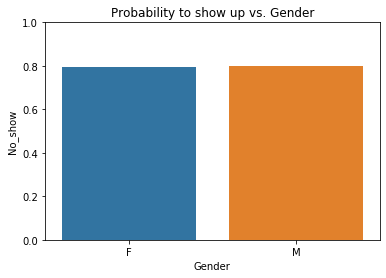

In [21]:
prob_gender = prob_show_up('Gender')
ax = sns.barplot(y=prob_gender,x=prob_gender.keys())
plt.title('Probability to show up vs. Gender')
plt.ylabel('Probability to show up')
plt.xlabel('')
plt.ylim(0,1)
ax = sns.barplot(y=prob_gender,x=prob_gender.keys());

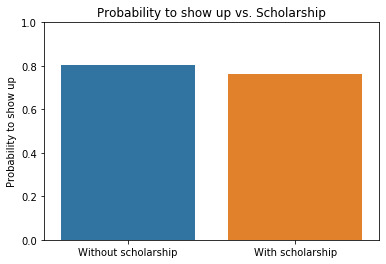

In [22]:
prob_scholarship = prob_show_up('Scholarship')
ax = sns.barplot(y=prob_scholarship,x=prob_scholarship.keys())
plt.title('Probability to show up vs. Scholarship')
plt.ylabel('Probability to show up')
plt.xlabel('')
plt.ylim(0,1)
plt.xticks([0,1],['Without scholarship','With scholarship']);

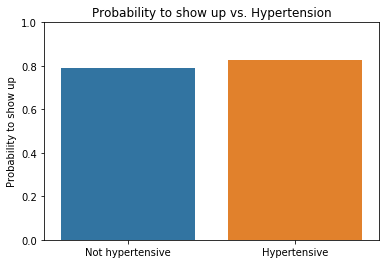

In [23]:
prob_hypertension = prob_show_up('Hypertension')
ax = sns.barplot(y=prob_hypertension,x=prob_hypertension.keys())
plt.title('Probability to show up vs. Hypertension')
plt.ylabel('Probability to show up')
plt.xlabel('')
plt.ylim(0,1)
plt.xticks([0,1],['Not hypertensive','Hypertensive']);

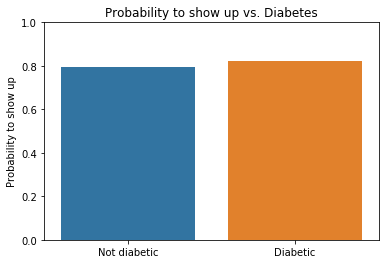

In [24]:
prob_diabetes = prob_show_up('Diabetes')
ax = sns.barplot(y=prob_diabetes,x=prob_diabetes.keys())
plt.title('Probability to show up vs. Diabetes')
plt.ylabel('Probability to show up')
plt.xlabel('')
plt.ylim(0,1)
plt.xticks([0,1],['Not diabetic','Diabetic']);

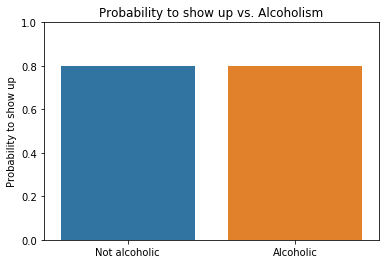

In [25]:
prob_hypertension = prob_show_up('Alcoholism')
ax = sns.barplot(y=prob_hypertension,x=prob_hypertension.keys())
plt.title('Probability to show up vs. Alcoholism')
plt.ylabel('Probability to show up')
plt.xlabel('')
plt.ylim(0,1)
plt.xticks([0,1],['Not alcoholic','Alcoholic']);

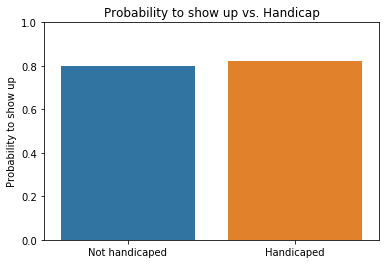

In [26]:
prob_handicap = prob_show_up('Handicap')
ax = sns.barplot(y=prob_handicap,x=prob_handicap.keys())
plt.title('Probability to show up vs. Handicap')
plt.ylabel('Probability to show up')
plt.xlabel('')
plt.ylim(0,1)
plt.xticks([0,1],['Not handicaped','Handicaped']);

As we can see above, based on this sample and without statistical analysis, gender and alcoholism don't have a direct impact on missing medical appointments. 

Characteristics that contribute to showing up for medical appointments:
* Don't receive Bolsa Familia financial aid
* Are hypertensive
* Are diabetic
* Are handicapped

Let's now see if the age is relevant to our study:

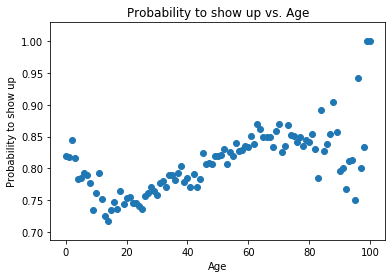

In [27]:
prob_age = prob_show_up('Age')
plt.title("Probability to show up vs. Age")
plt.scatter(x=prob_age.keys(),y=prob_age)
plt.xlabel('Age')
plt.ylabel('Probability to show up');

In [28]:
print(df[['Age']][df.No_show == 1].mean()-df[['Age']][df.No_show == 0].mean())

Age   -3.505639
dtype: float64


As we can see, a stronger dependency is observed with respect to Age.

## 2. Does the delay between the Schedule and the Appointment day influence the patient's presence?

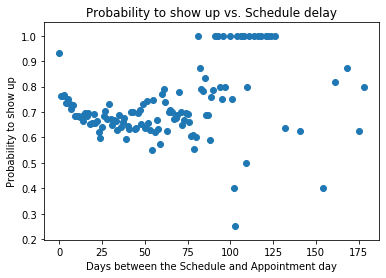

In [29]:
prob_delay = prob_show_up('Schedule_delay')
plt.title("Probability to show up vs. Schedule delay")
plt.scatter(x=prob_delay.keys(),y=prob_delay)
plt.xlabel('Days between the Schedule and Appointment day')
plt.ylabel('Probability to show up');

The schedule delay is not a good predictor of show up status.. Next, we'll see if the show up status varies depending on the neighborhood of the appointment.

## 3. In which neighborhoods are patients most absent?

First, let's see if there is a relevant difference on show up probability based on the neighboorhood of the appointment

In [30]:
prob_neighborhood = prob_show_up('Neighborhood')
df_neighborhood = pd.DataFrame.from_dict(prob_neighborhood)
df_neighborhood.rename(columns={'No_show':'Prob_show_up'},inplace=True)
df_neighborhood['Count'] = df.groupby('Neighborhood')['No_show'].count()
df_neighborhood.head()

,Prob_show_up,Count
Neighborhood,,
AEROPORTO,0.875000,8
ANDORINHAS,0.770324,2251
ANTÔNIO HONÓRIO,0.815498,271
ARIOVALDO FAVALESSA,0.780142,282
BARRO VERMELHO,0.784870,423


We will not considerate neighborhoods with less then 100 entries because data is not conclusive.

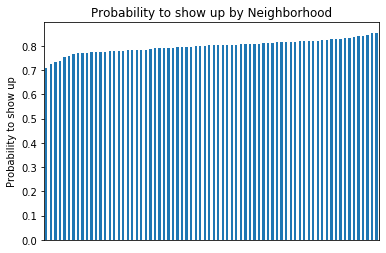

In [31]:
df_neighborhood = df_neighborhood[df_neighborhood.Count >= 100].sort_values('Prob_show_up')
ax = df_neighborhood['Prob_show_up'].plot(kind='bar').axes
ax.get_xaxis().set_visible(False)
plt.title("Probability to show up by Neighborhood")
plt.ylabel('Probability to show up');

We can see that the appointment location is relevant to determine the likelihood to show up some neighbourhoods have differents probabilities. Let's identify the 5 neighborhoods with lowest show up probability.

In [32]:
df_neighborhood.head()

,Prob_show_up,Count
Neighborhood,,
SANTOS DUMONT,0.710361,1274
SANTA CECÍLIA,0.725446,448
SANTA CLARA,0.734653,505
ITARARÉ,0.737382,3507
JESUS DE NAZARETH,0.756046,2853


## 4. What is the importance of sending an SMS?


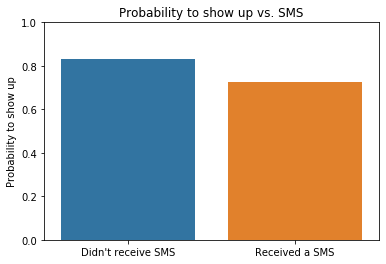

In [33]:
prob_SMS = prob_show_up('SMS_received')
ax = sns.barplot(y=prob_SMS,x=prob_SMS.keys())
plt.title('Probability to show up vs. SMS')
plt.ylabel('Probability to show up')
plt.xlabel('')
plt.ylim(0,1)
plt.xticks([0,1],["Didn't receive SMS",'Received a SMS']);

Contrary to what we might imagine, people who received an SMS are more likely to miss the appointment than people who didn't.

<a id='conclusions'></a>
## Conclusions

Main findings: 

We analyzed a dataset with 110.527 medical appointments. Based only on this sample without statitiscal tests, we can conclude: 
* Patients who **receive Bolsa Familia** are more likely to no-show than patiens who don't.
* Patients who **are not hypertensive** are more likely to no-show than patients who are.
* Patients who **are not diabetic** are more likely to no-show than patients who are.
* Patients who **are not handicaped** are more likely to no-show than people who are.
* **Youger partients** are more likely to no-show than older patients.
* Patients who schedule appointments in **Santos Dumont, Santa Cecilia, Santa Clara, Itararé and Jesus de Nazareth** are more likely to no-show than patients who schedule appointments in other neighborhoods.
* Patients who **who received an SMS** are more likely to no-show than patients who didn't.
* Alcoholism, Gender and the delay between the Schedule and the Appointment days are not relevant to predict no-show

With these findings, we could implement strategies to target populations and prevent no-show.

Limitations of this exploration:
* We didn't any statistical test to imply conclusion about the popumation parameter.
* We dropped the entire rows when data was not clear. 

Some references: 
* Multiple piecharts: https://stackoverflow.com/questions/25205247/multiple-pie-charts-using-matplotlib/25205547
* Matplotlib autopct: https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
* Inspiration: https://www.kaggle.com/somrikbanerjee/predicting-show-up-no-show#PART-I:-Data-Wrangling
* Ylim: https://stackoverflow.com/questions/33227473/how-to-set-the-range-of-y-axis-for-a-seaborn-boxplot